In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

X = pd.read_csv('K0_features.csv')
y = pd.read_excel('K0_Labels.xlsx')
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

preprocessing_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

X_processed = preprocessing_pipeline.fit_transform(X)
y_transformed=preprocessing_pipeline.fit_transform(y)
y_transformed=pd.DataFrame(y_transformed)

rf_param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500],
    'max_depth': [None, 1, 2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,5],  
}

xgb_param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500],
    'max_depth': [1, 2,3,4,5,6,7,8,9,10],
    'learning_rate': [0.0001,0.001,0.01,0.1,0.5],
}

rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Setup GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_processed, y_transformed.values)
xgb_grid_search.fit(X_processed, y_transformed.values)
print("RF Best Parameters:", rf_grid_search.best_params_)
print("RF Best Score:", rf_grid_search.best_score_)
print("XGB Best Parameters:", xgb_grid_search.best_params_)
print("XGB Best Score:", xgb_grid_search.best_score_)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RF Best Parameters: {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 20}
RF Best Score: -0.022654373694877914
XGB Best Parameters: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 10}
XGB Best Score: -0.02256514881313792


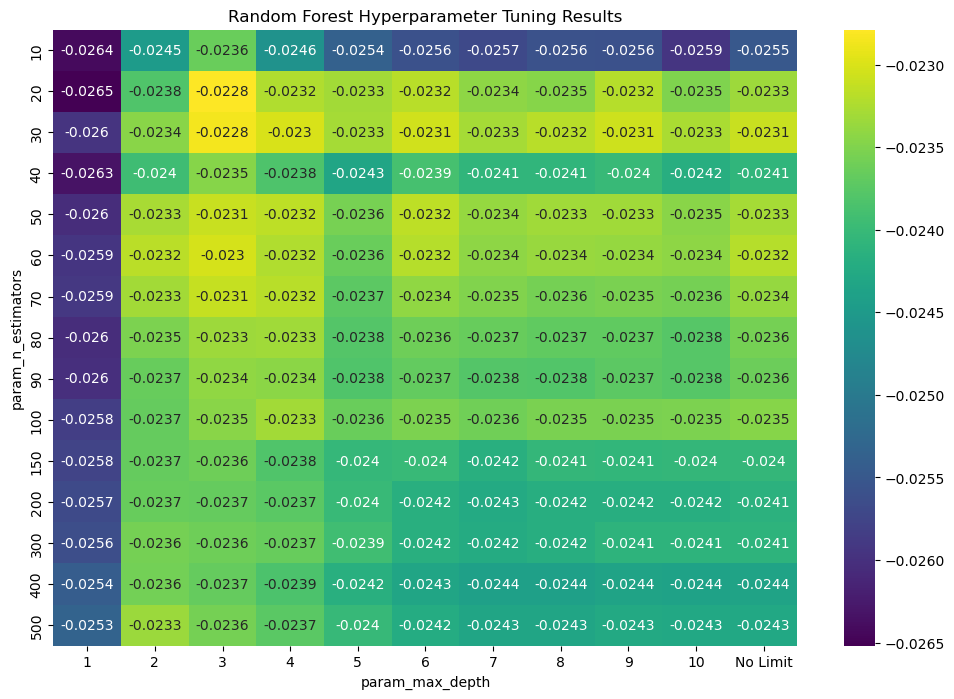

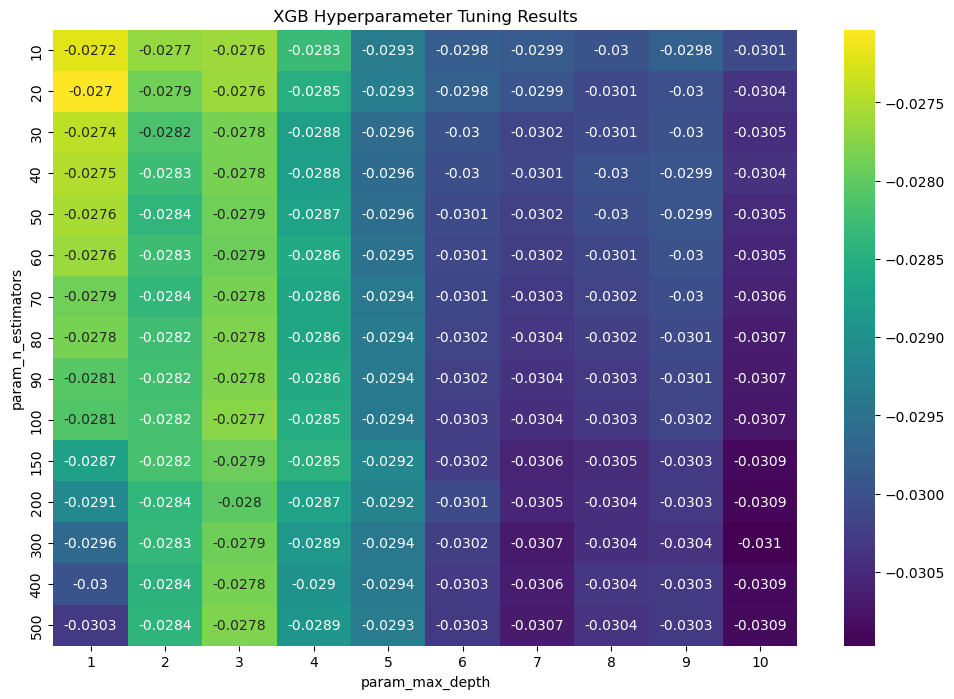

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_grid_search(cv_results, name_param_1, name_param_2, title):
    results_df = pd.DataFrame(cv_results)

    results_df = results_df[['mean_test_score', name_param_1, name_param_2]]
    results_df[name_param_2] = results_df[name_param_2].apply(lambda x: 'No Limit' if x is None else x)
    pivot_table = results_df.pivot_table(values='mean_test_score', index=name_param_1, columns=name_param_2)

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".3g", cmap='viridis')
    plt.title(title)
    plt.xlabel(name_param_2)
    plt.ylabel(name_param_1)
    plt.show()

param_name_1 = 'param_n_estimators'
param_name_2 = 'param_max_depth'

plot_grid_search(
    rf_grid_search.cv_results_,
    param_name_1,
    param_name_2,
    'Random Forest Hyperparameter Tuning Results'
)

plot_grid_search(
    xgb_grid_search.cv_results_,
    param_name_1,
    param_name_2,
    'XGB Hyperparameter Tuning Results'
)


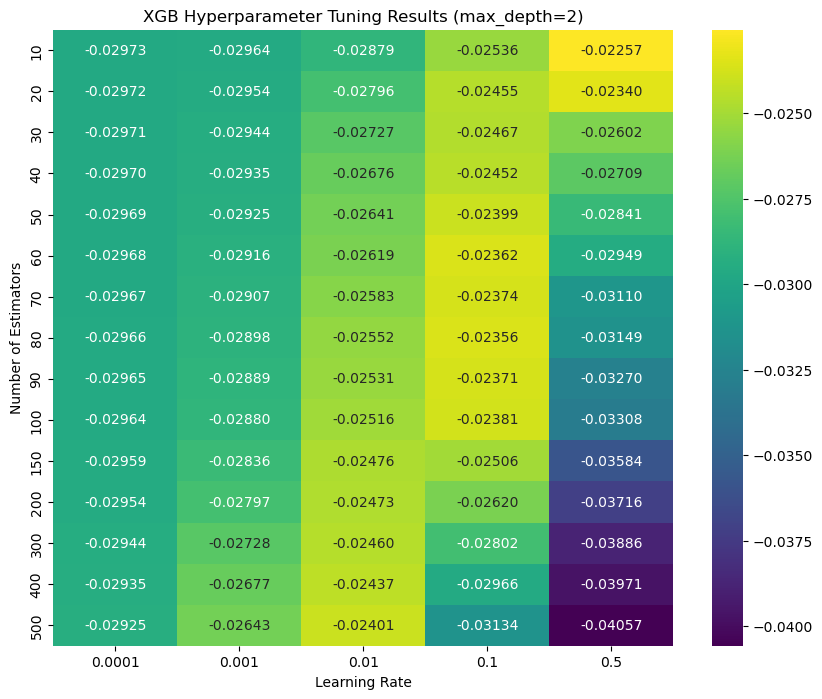

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_xgb_search(cv_results, title):
    results_df = pd.DataFrame(cv_results)
    
    filtered_results = results_df[results_df['param_max_depth'] == 1]
    
    pivot_table = filtered_results.pivot_table(values='mean_test_score', 
                                               index='param_n_estimators', 
                                               columns='param_learning_rate')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".5f", cmap='viridis')
    plt.title(title)
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Estimators')
    plt.show()

# Plotting the XGB results
plot_xgb_search(xgb_grid_search.cv_results_, 'XGB Hyperparameter Tuning Results (max_depth=2)')

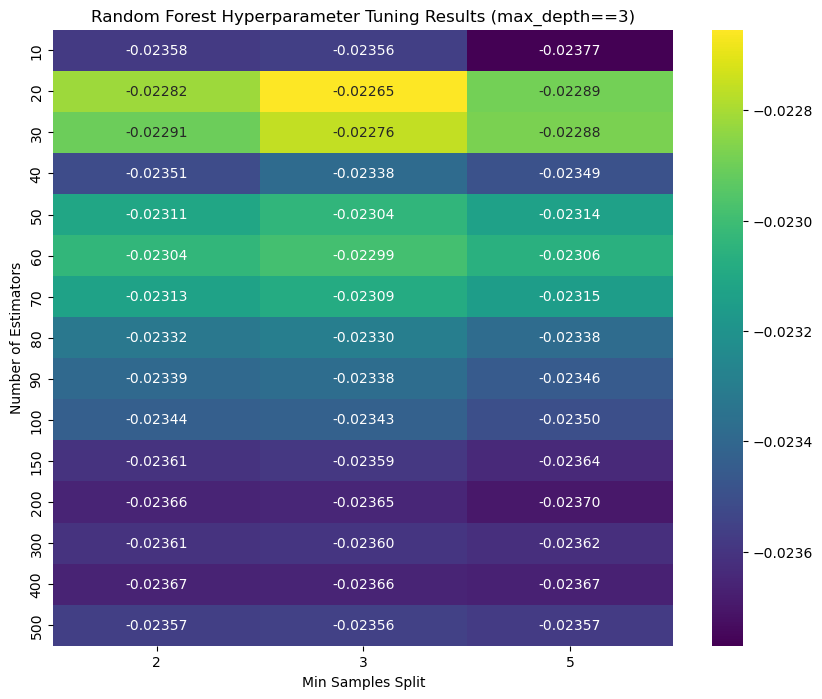

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_rf_search(cv_results, title):
    results_df = pd.DataFrame(cv_results)
    
    filtered_results = results_df[results_df['param_max_depth'] == 3]
    
    pivot_table = filtered_results.pivot_table(values='mean_test_score', 
                                               index='param_n_estimators', 
                                               columns='param_min_samples_split')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".5f", cmap='viridis')
    plt.title(title)
    plt.xlabel('Min Samples Split')
    plt.ylabel('Number of Estimators')
    plt.show()

# Plotting the RandomForest results
plot_rf_search(rf_grid_search.cv_results_, 'Random Forest Hyperparameter Tuning Results (max_depth==3)')

In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

X = pd.read_csv('K1features.csv')
y = pd.read_excel('Expanded_TrainingK1.xlsx')
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

preprocessing_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

X_processed = preprocessing_pipeline.fit_transform(X)
y_transformed=preprocessing_pipeline.fit_transform(y)
y_transformed=pd.DataFrame(y_transformed)
rf_param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500],
    'max_depth': [None, 1, 2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,5], 
}

xgb_param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200,300,400,500],
    'max_depth': [1, 2,3,4,5,6,7,8,9,10],
    'learning_rate': [0.0001,0.001,0.01,0.1,0.5],
}

rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_processed, y_transformed.values) 
xgb_grid_search.fit(X_processed, y_transformed.values)

print("RF Best Parameters:", rf_grid_search.best_params_)
print("RF Best Score:", rf_grid_search.best_score_)
print("XGB Best Parameters:", xgb_grid_search.best_params_)
print("XGB Best Score:", xgb_grid_search.best_score_)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RF Best Parameters: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 60}
RF Best Score: -0.018542573770312043
XGB Best Parameters: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
XGB Best Score: -0.017854552913328898


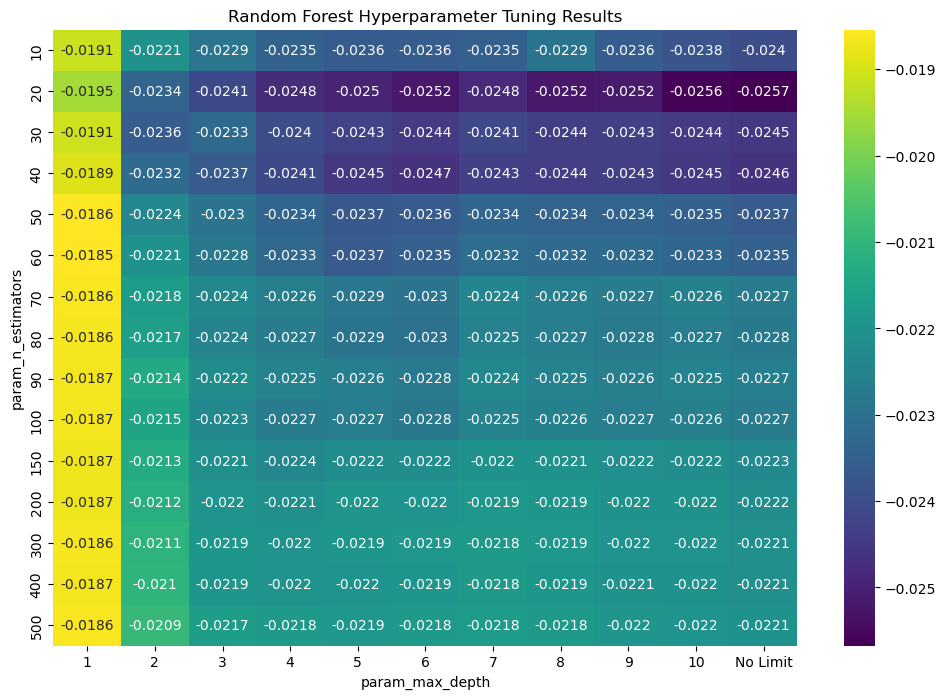

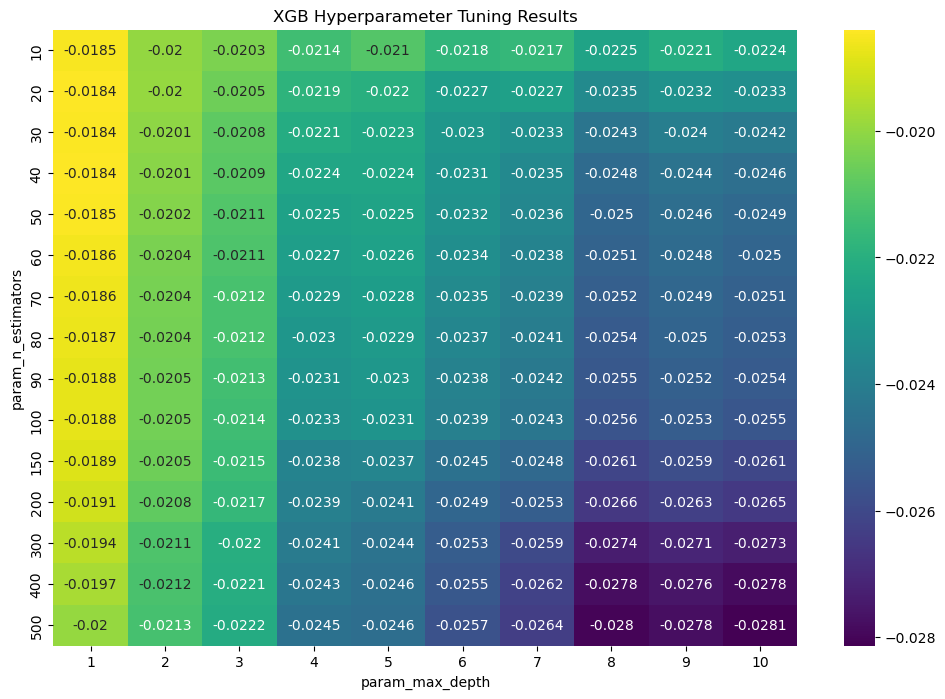

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_grid_search(cv_results, name_param_1, name_param_2, title):
    results_df = pd.DataFrame(cv_results)
    results_df = results_df[['mean_test_score', name_param_1, name_param_2]]
    results_df[name_param_2] = results_df[name_param_2].apply(lambda x: 'No Limit' if x is None else x)
    pivot_table = results_df.pivot_table(values='mean_test_score', index=name_param_1, columns=name_param_2)

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".3g", cmap='viridis')
    plt.title(title)
    plt.xlabel(name_param_2)
    plt.ylabel(name_param_1)
    plt.show()

param_name_1 = 'param_n_estimators'
param_name_2 = 'param_max_depth'

plot_grid_search(
    rf_grid_search.cv_results_,
    param_name_1,
    param_name_2,
    'Random Forest Hyperparameter Tuning Results'
)

plot_grid_search(
    xgb_grid_search.cv_results_,
    param_name_1,
    param_name_2,
    'XGB Hyperparameter Tuning Results'
)

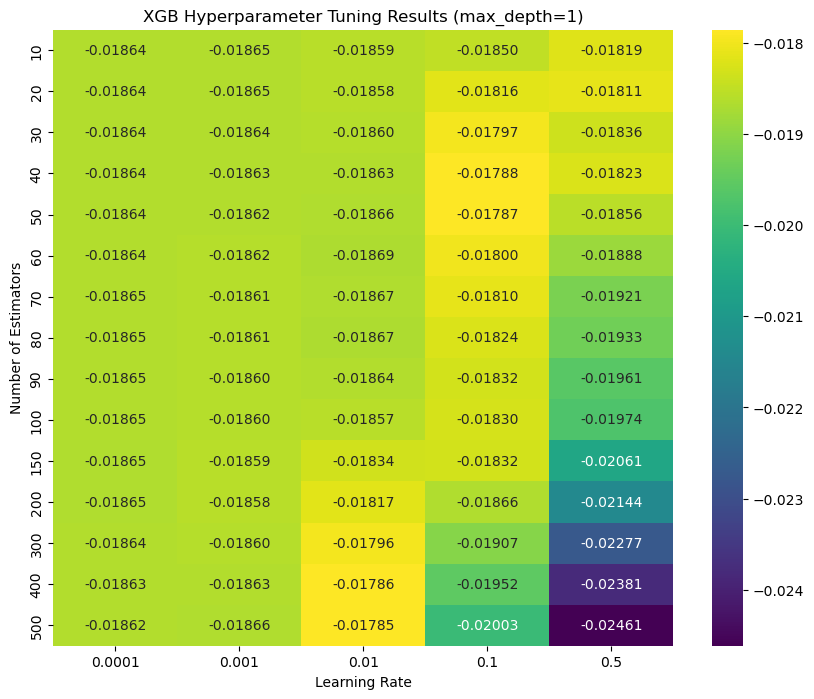

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_xgb_search(cv_results, title):
    results_df = pd.DataFrame(cv_results)
    
    filtered_results = results_df[results_df['param_max_depth'] == 1]
    
    pivot_table = filtered_results.pivot_table(values='mean_test_score', 
                                               index='param_n_estimators', 
                                               columns='param_learning_rate')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".5f", cmap='viridis')
    plt.title(title)
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Estimators')
    plt.show()

plot_xgb_search(xgb_grid_search.cv_results_, 'XGB Hyperparameter Tuning Results (max_depth=1)')

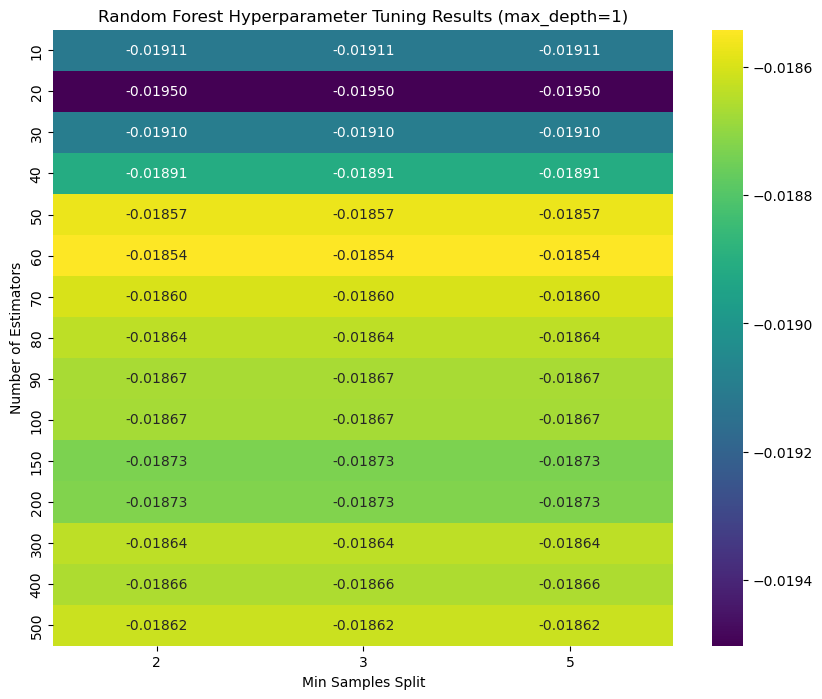

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_rf_search(cv_results, title):
    results_df = pd.DataFrame(cv_results)
    
    filtered_results = results_df[results_df['param_max_depth'] == 1]
    
    pivot_table = filtered_results.pivot_table(values='mean_test_score', 
                                               index='param_n_estimators', 
                                               columns='param_min_samples_split')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".5f", cmap='viridis')
    plt.title(title)
    plt.xlabel('Min Samples Split')
    plt.ylabel('Number of Estimators')
    plt.show()

plot_rf_search(rf_grid_search.cv_results_, 'Random Forest Hyperparameter Tuning Results (max_depth=1)')